In [3]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

In [4]:
filename = 'AirQualityUCI.csv'

#Read csv

pdf = pd.read_csv(filename)
pdf =pdf.drop('Date', axis = 1)
pdf =pdf.drop('Time', axis = 1)
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (9357, 13)


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [5]:
print ("Shape of dataset after cleaning: ", pdf.size)
pdf[[ 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
        'PT08.S5(O3)','T', 'RH', 'AH']] =pdf[[ 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 
        'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)','T', 'RH', 'AH']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset after cleaning:  121641
Shape of dataset after cleaning:  121641


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [6]:
featureset = pdf[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)','T', 'RH', 'AH','PT08.S3(NOx)','PT08.S1(CO)']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.95611137, 0.25197984, 0.80356466, 0.2179869 , 0.57962963,
        0.87326247, 0.86214063, 0.99271526, 0.4356573 , 0.69642857],
       [0.95327985, 0.22462203, 0.79408419, 0.18046456, 0.54074074,
        0.87203598, 0.85798407, 0.99255554, 0.47658689, 0.66607143],
       [0.95422369, 0.20734341, 0.79256731, 0.19714116, 0.58148148,
        0.86631235, 0.87980603, 0.99267768, 0.46479362, 0.71517857],
       [0.95422369, 0.20158387, 0.79332575, 0.22156045, 0.5962963 ,
        0.86263287, 0.90058885, 0.99285817, 0.44814429, 0.70357143],
       [0.95139217, 0.18070554, 0.78308684, 0.19714116, 0.58518519,
        0.86345053, 0.89920333, 0.99286855, 0.48733958, 0.65714286]])

In [8]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.07988875 0.06415411 ... 0.36159949 0.36157714 0.36404101]
 [0.07988875 0.         0.07279577 ... 0.37972602 0.36321792 0.37437426]
 [0.06415411 0.07279577 0.         ... 0.36393381 0.36313557 0.3666224 ]
 ...
 [0.36159949 0.37972602 0.36393381 ... 0.         0.08884633 0.04621587]
 [0.36157714 0.36321792 0.36313557 ... 0.08884633 0.         0.04579834]
 [0.36404101 0.37437426 0.3666224  ... 0.04621587 0.04579834 0.        ]]


In [9]:
agglom = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean', linkage = 'average')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [10]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,cluster_
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,1
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,1
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,1
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,1
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'PT08.S3(NOx)')

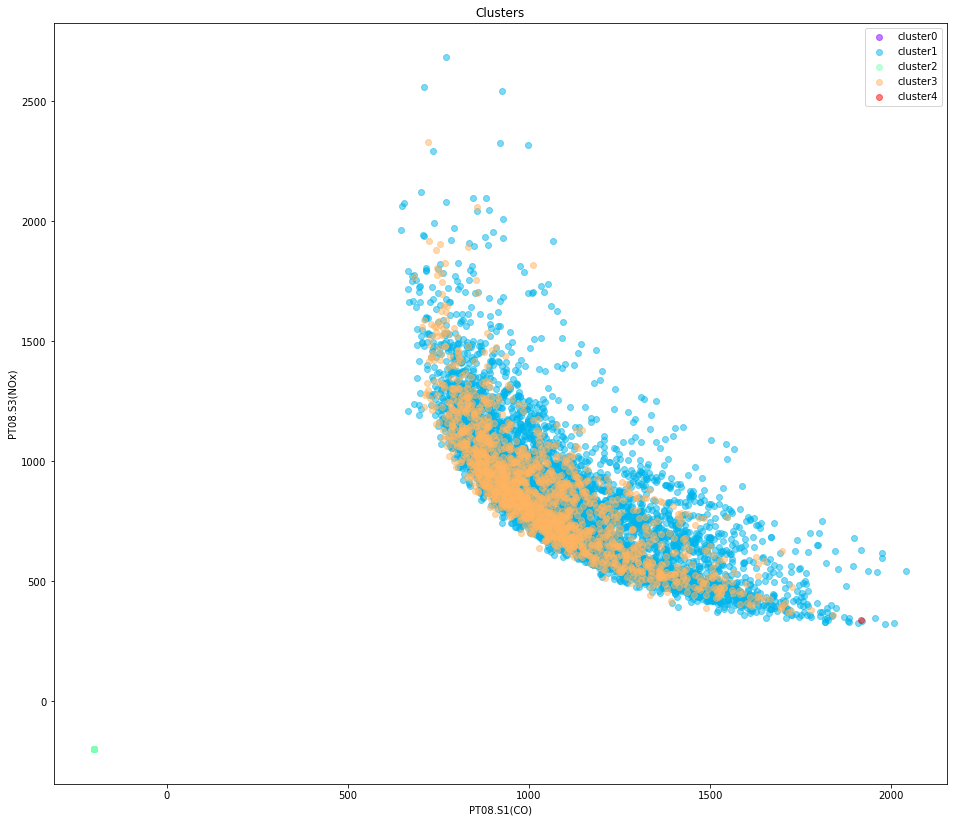

In [11]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14)) 

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
        plt.text(subset['PT08.S1(CO)'][i], subset['PT08.S3(NOx)'][i],s=None,rotation=25) 
    plt.scatter(subset['PT08.S1(CO)'], subset['PT08.S3(NOx)'], c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('PT08.S1(CO)')
plt.ylabel('PT08.S3(NOx)')

In [14]:
pdf.groupby('cluster_')['cluster_'].count()

cluster_
0     330
1    7344
2      36
3    1646
4       1
Name: cluster_, dtype: int64

In [15]:
from sklearn.metrics import silhouette_score

#OUTPUT: [0 0 0 1 0 1 0 1 0 2 1 0 1 0 0 
silhouette_score(x, agglom.labels_)

0.19744358056368816

In [16]:
agglom = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean', linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [17]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,cluster_
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,4
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,4
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,4
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,4
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,4


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'PT08.S3(NOx)')

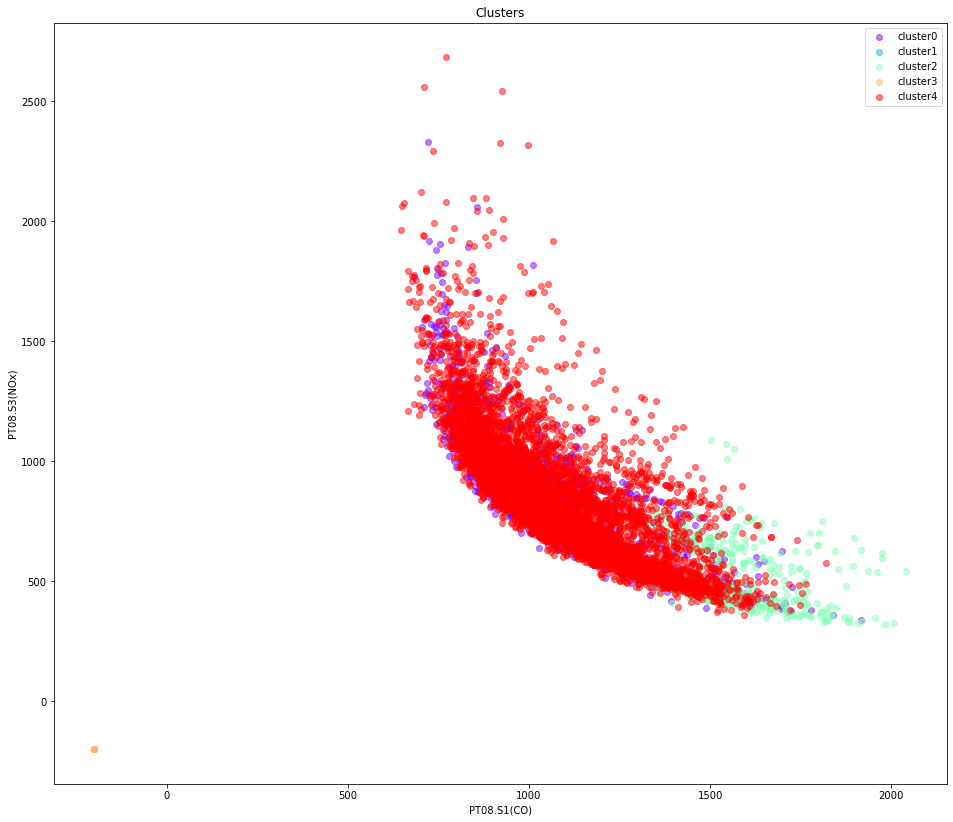

In [18]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14)) 

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
        plt.text(subset['PT08.S1(CO)'][i], subset['PT08.S3(NOx)'][i],s=None,rotation=25) 
    plt.scatter(subset['PT08.S1(CO)'], subset['PT08.S3(NOx)'], c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('PT08.S1(CO)')
plt.ylabel('PT08.S3(NOx)')

In [19]:
pdf.groupby('cluster_')['cluster_'].count()

cluster_
0    1647
1      49
2     543
3     317
4    6801
Name: cluster_, dtype: int64

In [20]:
from sklearn.metrics import silhouette_score

#OUTPUT: [0 0 0 1 0 1 0 1 0 2 1 0 1 0 0 
silhouette_score(x, agglom.labels_)

0.2313101752988929

In [23]:
agglom = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean', linkage = 'single')
agglom.fit(feature_mtx)
agglom.labels_

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [24]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,cluster_
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,3
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,3
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,3
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,3
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,3


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'PT08.S3(NOx)')

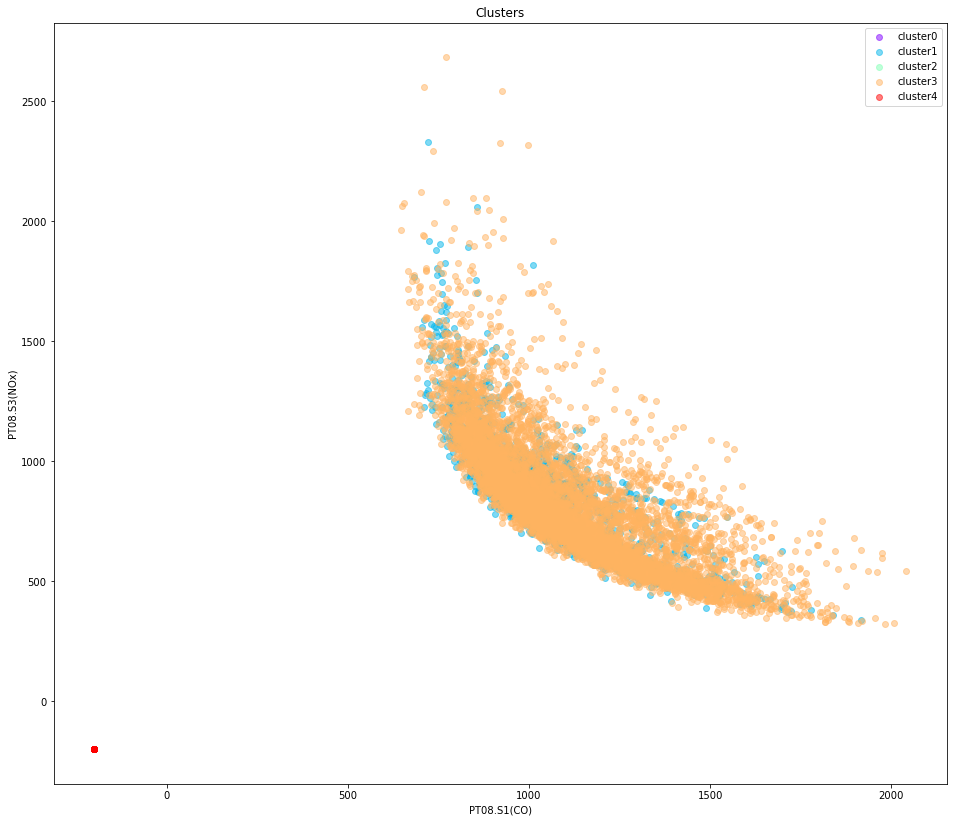

In [25]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14)) 

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
        plt.text(subset['PT08.S1(CO)'][i], subset['PT08.S3(NOx)'][i],s=None,rotation=25) 
    plt.scatter(subset['PT08.S1(CO)'], subset['PT08.S3(NOx)'], c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('PT08.S1(CO)')
plt.ylabel('PT08.S3(NOx)')

In [26]:
pdf.groupby('cluster_')['cluster_'].count()

cluster_
0     330
1    1647
2       5
3    7344
4      31
Name: cluster_, dtype: int64

In [27]:
from sklearn.metrics import silhouette_score

#OUTPUT: [0 0 0 1 0 1 0 1 0 2 1 0 1 0 0 
silhouette_score(x, agglom.labels_)

0.21905847025081035